In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install datasist==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [3]:
Chocolate = pd.read_csv('/content/Chocolate Sales.csv')
Chocolate.head(2)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94


## data cleaning

In [4]:
Chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [5]:
Chocolate.duplicated().sum()

np.int64(0)

In [6]:
Chocolate.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [7]:
Chocolate.columns = Chocolate.columns.str.lower().str.replace(' ', '_')
Chocolate.head(2)

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94


In [8]:
Chocolate['date']=pd.to_datetime(Chocolate['date'],errors='coerce')

<ipython-input-8-1489a607c67e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Chocolate['date']=pd.to_datetime(Chocolate['date'],errors='coerce')


In [9]:
Chocolate.isnull().sum()

,0
sales_person,0
country,0
product,0
date,0
amount,0
boxes_shipped,0


In [10]:
Chocolate['amount'] = Chocolate['amount'].astype(str)
Chocolate['amount'] = Chocolate['amount'].str.replace('$', '')
Chocolate['amount'] = Chocolate['amount'].str.replace(',', '')
Chocolate['amount'] = Chocolate['amount'].astype(int)

## feature engineering

In [11]:
Chocolate['year'] = Chocolate['date'].dt.year
Chocolate['quarter'] = Chocolate['date'].dt.quarter
Chocolate['month'] = Chocolate['date'].dt.month
Chocolate['month_name'] = Chocolate['date'].dt.month_name()
Chocolate['day_name'] = Chocolate['date'].dt.day_name()

In [12]:
def season(month):
  if month in [12,1,2]:
    return 'winter'
  elif month in [3,4,5]:
    return 'spring'
  elif month in [6,7,8]:
    return 'summer'
  else:
    return 'autumn'

In [13]:
Chocolate['season'] = Chocolate['month'].apply(season)
Chocolate.head()

,sales_person,country,product,date,amount,boxes_shipped,year,quarter,month,month_name,day_name,season
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,2022,1,1,January,Tuesday,winter
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,2022,3,8,August,Monday,summer
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91,2022,3,7,July,Thursday,summer
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342,2022,2,4,April,Wednesday,spring
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184,2022,1,2,February,Thursday,winter


In [14]:
Chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sales_person   1094 non-null   object        
 1   country        1094 non-null   object        
 2   product        1094 non-null   object        
 3   date           1094 non-null   datetime64[ns]
 4   amount         1094 non-null   int64         
 5   boxes_shipped  1094 non-null   int64         
 6   year           1094 non-null   int32         
 7   quarter        1094 non-null   int32         
 8   month          1094 non-null   int32         
 9   month_name     1094 non-null   object        
 10  day_name       1094 non-null   object        
 11  season         1094 non-null   object        
dtypes: datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 89.9+ KB


In [15]:
Chocolate.to_csv('Chocolate_Sales_update.csv', index=False)

## data analysis

In [16]:
Chocolate.describe()

,date,amount,boxes_shipped,year,quarter,month
count,1094,1094.000000,1094.000000,1094.0,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989,2022.0,1.897623,4.576782
min,2022-01-03 00:00:00,7.000000,1.000000,2022.0,1.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000,2022.0,1.000000,3.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000,2022.0,2.000000,5.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000,2022.0,3.000000,7.000000
max,2022-08-31 00:00:00,22050.000000,709.000000,2022.0,3.000000,8.000000
std,NaN,4102.442014,121.544145,0.0,0.780910,2.316465


In [17]:
Chocolate.describe(include='object')

,sales_person,country,product,month_name,day_name,season
count,1094,1094,1094,1094,1094,1094
unique,25,6,22,8,5,3
top,Kelci Walkden,Australia,Eclairs,June,Monday,summer
freq,54,205,60,163,253,446


In [18]:
#the total amount of chocolate sales
total_sales = Chocolate['amount'].sum()
total_sales

np.int64(6183625)

In [19]:
#the total amount of chocolate boxes
total_boxes = Chocolate['boxes_shipped'].sum()
total_boxes

np.int64(177007)

In [20]:
#the average amount of chocolate sales per transaction
avg_sales_per_transaction = Chocolate['amount'].mean().round(2)
avg_sales_per_transaction

np.float64(5652.31)

In [21]:
#the average amount of chocolate boxes per transaction
avg_boxes_per_transaction = Chocolate['boxes_shipped'].mean().round(0)
avg_boxes_per_transaction

np.float64(162.0)

In [22]:
#different product categories are there in the dataset
num_product_categories = Chocolate['product'].nunique()
num_product_categories

22

In [23]:
#the total amount of chocolate sales for the year 2022
sales_2022 = Chocolate[Chocolate['year'] == 2022]['amount'].sum()
sales_2022

np.int64(6183625)

In [24]:
#products has the highest total sales amount
category_sales = Chocolate.groupby('product')['amount'].sum().sort_values(ascending=False).head(10)
category_sales

,amount
product,
Smooth Sliky Salty,349692
50% Dark Bites,341712
White Choc,329147
Peanut Butter Cubes,324842
Eclairs,312445
99% Dark & Pure,299796
85% Dark Bars,299229
Organic Choco Syrup,294700
Spicy Special Slims,293454


In [25]:
#products has the highest total boxes shipped
category_boxes = Chocolate.groupby('product')['boxes_shipped'].sum().sort_values(ascending=False).head(10)
category_boxes

,boxes_shipped
product,
50% Dark Bites,9792
Smooth Sliky Salty,8810
Eclairs,8757
Caramel Stuffed Bars,8717
Spicy Special Slims,8685
Drinking Coco,8660
Milk Bars,8330
Peanut Butter Cubes,8304
After Nines,8257


In [26]:
#countries has the highest total sales amount
country_sales = Chocolate.groupby('country')['amount'].sum().sort_values(ascending=False)
country_sales

,amount
country,
Australia,1137367
UK,1051792
India,1045800
USA,1035349
Canada,962899
New Zealand,950418


In [27]:
#countries has the highest total boxes shipped
country_boxes = Chocolate.groupby('country')['boxes_shipped'].sum().sort_values(ascending=False)
country_boxes

,boxes_shipped
country,
Australia,32647
Canada,31221
UK,30265
India,29470
USA,26824
New Zealand,26580


In [28]:
#salesperson has the highest total sales amount
salesperson_sales = Chocolate.groupby('sales_person')['amount'].sum().sort_values(ascending=False).head(10)
salesperson_sales

,amount
sales_person,
Ches Bonnell,320901
Oby Sorrel,316645
Madelene Upcott,316099
Brien Boise,312816
Kelci Walkden,311710
Van Tuxwell,303149
Dennison Crosswaite,291669
Beverie Moffet,278922
Kaine Padly,266490


In [29]:
#salesperson has the highest total boxes shipped
salesperson_boxes = Chocolate.groupby('sales_person')['boxes_shipped'].sum().sort_values(ascending=False).head(10)
salesperson_boxes

,boxes_shipped
sales_person,
Karlen McCaffrey,9658
Beverie Moffet,9214
Dennison Crosswaite,8767
Kelci Walkden,8702
Oby Sorrel,8608
Brien Boise,8102
Marney O'Breen,8043
Jan Morforth,7661
Ches Bonnell,7522


In [30]:
# the average amount of chocolate sales per day of the week
avg_sales_per_day_of_week = Chocolate.groupby('day_name')['amount'].mean().sort_values(ascending=False).round(2)
avg_sales_per_day_of_week

,amount
day_name,
Thursday,5927.57
Tuesday,5848.72
Friday,5559.03
Monday,5477.40
Wednesday,5475.27


In [31]:
# the average amount of chocolate boxes per day of the week
avg_boxes_per_day_of_week = Chocolate.groupby('day_name')['boxes_shipped'].mean().sort_values(ascending=False).round(0)
avg_boxes_per_day_of_week

,boxes_shipped
day_name,
Friday,171.0
Wednesday,167.0
Monday,162.0
Thursday,155.0
Tuesday,155.0


In [32]:
# the average amount of chocolate sales per season
avg_sales_per_season = Chocolate.groupby('season')['amount'].mean().sort_values(ascending=False).round(2)
avg_sales_per_season

,amount
season,
winter,6043.49
spring,5667.78
summer,5407.44


In [33]:
# the average amount of chocolate boxes per season
avg_boxes_per_season = Chocolate.groupby('season')['boxes_shipped'].mean().sort_values(ascending=False).round(0)
avg_boxes_per_season

,boxes_shipped
season,
winter,173.0
spring,163.0
summer,155.0


In [34]:
#month had the highest total sales amount in 2022
sales_by_month_2022 = Chocolate[Chocolate['year'] == 2022].groupby('month_name')['amount'].sum().sort_values(ascending=False)
sales_by_month_2022

,amount
month_name,
January,896105
June,865144
July,803425
May,752892
March,749483
August,743148
February,699377
April,674051


In [35]:
#month had the highest total boxes shipped in 2022
boxes_by_month_2022 = Chocolate[Chocolate['year'] == 2022].groupby('month_name')['boxes_shipped'].sum().sort_values(ascending=False)
boxes_by_month_2022

,boxes_shipped
month_name,
January,27535
June,26260
July,22876
May,21856
April,21003
August,19901
March,19561
February,18015


In [36]:
#the total amount of chocolate sales for each product category in each quarter
sales_by_category_quarter = Chocolate.groupby(['product', 'quarter'])['amount'].sum().head(6)
sales_by_category_quarter

product         quarter
50% Dark Bites  1          132811
                2          111153
                3           97748
70% Dark Bites  1          114667
                2           82768
                3           14175
Name: amount, dtype: int64

In [37]:
#the total amount of chocolate sales for each quarter
sales_by_quarter = Chocolate.groupby(['quarter'])['amount'].sum().sort_values(ascending=False)
sales_by_quarter

,amount
quarter,
1,2344965
2,2292087
3,1546573


In [38]:
#the average amount of chocolate sales for each quarter
average_sales_by_quarter = Chocolate.groupby(['quarter'])['amount'].mean().sort_values(ascending=False).round(2)
average_sales_by_quarter

,amount
quarter,
1,5936.62
2,5509.82
3,5464.92


In [39]:
#the total amount of chocolate boxes shipped for each quarter
boxes_by_quarter = Chocolate.groupby(['quarter'])['boxes_shipped'].sum().sort_values(ascending=False)
boxes_by_quarter

,boxes_shipped
quarter,
2,69119
1,65111
3,42777


## data reprocessing

In [40]:
Chocolate.head(2)

,sales_person,country,product,date,amount,boxes_shipped,year,quarter,month,month_name,day_name,season
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,2022,1,1,January,Tuesday,winter
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,2022,3,8,August,Monday,summer


In [41]:
Chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sales_person   1094 non-null   object        
 1   country        1094 non-null   object        
 2   product        1094 non-null   object        
 3   date           1094 non-null   datetime64[ns]
 4   amount         1094 non-null   int64         
 5   boxes_shipped  1094 non-null   int64         
 6   year           1094 non-null   int32         
 7   quarter        1094 non-null   int32         
 8   month          1094 non-null   int32         
 9   month_name     1094 non-null   object        
 10  day_name       1094 non-null   object        
 11  season         1094 non-null   object        
dtypes: datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 89.9+ KB


In [42]:
Chocolate_1 = pd.get_dummies(Chocolate,columns=['country']  ,drop_first=True, dtype=np.int16)
Chocolate_1.head()

,sales_person,product,date,amount,boxes_shipped,year,quarter,month,month_name,day_name,season,country_Canada,country_India,country_New Zealand,country_UK,country_USA
0,Jehu Rudeforth,Mint Chip Choco,2022-01-04,5320,180,2022,1,1,January,Tuesday,winter,0,0,0,1,0
1,Van Tuxwell,85% Dark Bars,2022-08-01,7896,94,2022,3,8,August,Monday,summer,0,1,0,0,0
2,Gigi Bohling,Peanut Butter Cubes,2022-07-07,4501,91,2022,3,7,July,Thursday,summer,0,1,0,0,0
3,Jan Morforth,Peanut Butter Cubes,2022-04-27,12726,342,2022,2,4,April,Wednesday,spring,0,0,0,0,0
4,Jehu Rudeforth,Peanut Butter Cubes,2022-02-24,13685,184,2022,1,2,February,Thursday,winter,0,0,0,1,0


In [43]:
Chocolate_1 = pd.get_dummies(Chocolate,drop_first=True, dtype=np.int16)
Chocolate_1.head()

,date,amount,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,2022-01-04,5320,180,2022,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2022-08-01,7896,94,2022,3,8,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2022-07-07,4501,91,2022,3,7,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,2022-04-27,12726,342,2022,2,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2022-02-24,13685,184,2022,1,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [44]:
from sklearn.preprocessing import OneHotEncoder
Chocolate_2 = Chocolate
onehot = OneHotEncoder(drop='first')
onehot.fit(Chocolate_2[["sales_person",	"country"	,"product",	"month_name",	"day_name",	"season"]])

OneHotEncoder(drop='first')

In [45]:
one_hot_chocolate = onehot.transform(Chocolate_2[["sales_person",	"country"	,"product",	"month_name",	"day_name",	"season"]])
one_hot_chocolate.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
chocolate_encoded = pd.DataFrame(one_hot_chocolate.toarray(), columns=onehot.get_feature_names_out())
chocolate_encoded

,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,sales_person_Dennison Crosswaite,sales_person_Dotty Strutley,sales_person_Gigi Bohling,sales_person_Gunar Cockshoot,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1091,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [47]:
chocolate_final = pd.concat([Chocolate_2, chocolate_encoded], axis=1)
chocolate_final.drop(['sales_person',	'country'	,'product',	'month_name',	'day_name',	'season','date'], axis=1, inplace=True)
chocolate_final.head()

,amount,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,5320,180,2022,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,7896,94,2022,3,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,4501,91,2022,3,7,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,12726,342,2022,2,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,13685,184,2022,1,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## handle outliers

In [48]:
chocolate_final.describe()

,amount,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
count,1094.000000,1094.000000,1094.0,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,5652.308044,161.797989,2022.0,1.897623,4.576782,0.039305,0.045704,0.048446,0.029250,0.043876,...,0.136197,0.148995,0.119744,0.123400,0.231261,0.191956,0.201097,0.201097,0.407678,0.241316
std,4102.442014,121.544145,0.0,0.780910,2.316465,0.194409,0.208938,0.214805,0.168585,0.204912,...,0.343155,0.356246,0.324810,0.329047,0.421832,0.394019,0.401004,0.401004,0.491628,0.428077
min,7.000000,1.000000,2022.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2390.500000,70.000000,2022.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4868.500000,135.000000,2022.0,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8027.250000,228.750000,2022.0,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,22050.000000,709.000000,2022.0,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='amount'>

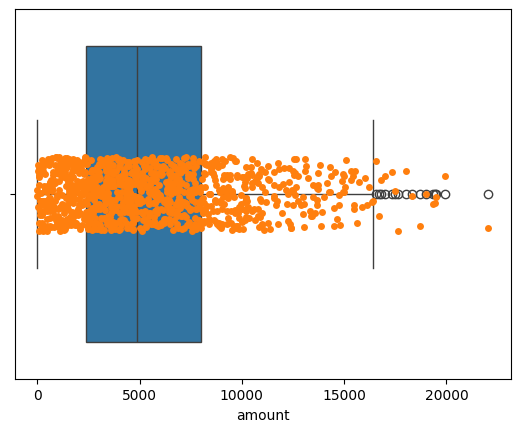

In [49]:
sns.boxplot(data = chocolate_final , x = 'amount')
sns.stripplot(data = chocolate_final , x = 'amount')

<Axes: xlabel='boxes_shipped'>

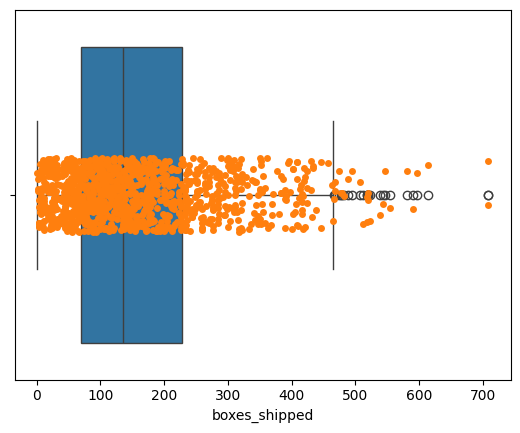

In [50]:
sns.boxplot(data = chocolate_final , x = 'boxes_shipped')
sns.stripplot(data = chocolate_final , x = 'boxes_shipped')

In [51]:
from datasist.structdata import detect_outliers

outlier_indices = detect_outliers(chocolate_final , 0 , ['amount'])
outlier_indices

[57, 66, 119, 135, 212, 257, 372, 434, 543, 589, 609, 751, 806, 891, 949, 1008]

In [52]:
from datasist.structdata import detect_outliers
detect_outliers = detect_outliers(chocolate_final, 0 , ['amount'])
median = chocolate_final['amount'].median()
chocolate_final['amount'].loc[detect_outliers] = median

<ipython-input-52-2a1fc3c23d61>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  chocolate_final['amount'].loc[detect_outliers] = median
<ipython-input-52-2a1fc3c23d61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

<Axes: xlabel='amount'>

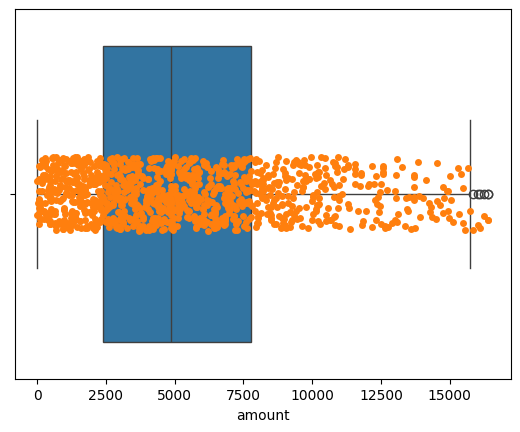

In [53]:
sns.boxplot(data = chocolate_final , x = 'amount')
sns.stripplot(data = chocolate_final , x = 'amount')

In [54]:
from datasist.structdata import detect_outliers

outlier_indices = detect_outliers(chocolate_final , 0 , ['boxes_shipped'])
outlier_indices

[39,
 97,
 109,
 121,
 150,
 171,
 188,
 340,
 445,
 458,
 463,
 584,
 665,
 672,
 692,
 730,
 765,
 769,
 823,
 852,
 862,
 865,
 875,
 978,
 1028,
 1070]

In [55]:
from datasist.structdata import detect_outliers
detect_outliers = detect_outliers(chocolate_final, 0 , ['boxes_shipped'])
median = chocolate_final['boxes_shipped'].median()
chocolate_final['boxes_shipped'].loc[detect_outliers] = median

<ipython-input-55-74529e6b4899>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  chocolate_final['boxes_shipped'].loc[detect_outliers] = median
<ipython-input-55-74529e6b4899>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

<Axes: xlabel='boxes_shipped'>

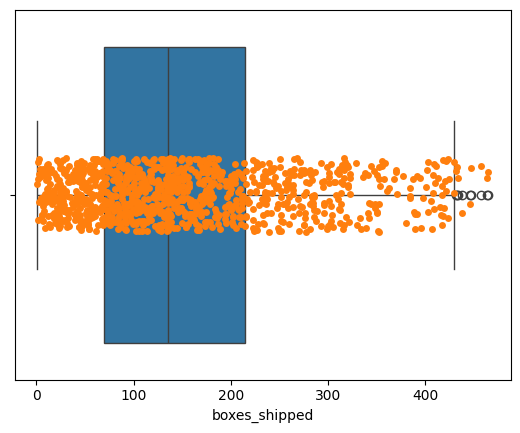

In [56]:
sns.boxplot(data = chocolate_final , x = 'boxes_shipped')
sns.stripplot(data = chocolate_final , x = 'boxes_shipped')

## output and input

In [57]:
input= chocolate_final.drop('amount',axis=1)
output= chocolate_final['amount']

In [58]:
input

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,180,2022,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,94,2022,3,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,91,2022,3,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,342,2022,2,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,184,2022,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,323,2022,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1090,119,2022,2,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1091,217,2022,3,7,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1092,384,2022,3,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [59]:
output

,amount
0,5320.0
1,7896.0
2,4501.0
3,12726.0
4,13685.0
...,...
1089,4410.0
1090,6559.0
1091,574.0
1092,2086.0


In [60]:
from sklearn.model_selection import train_test_split
input_train,input_test,output_train,output_test=train_test_split(input,output,test_size=0.2,shuffle=True,random_state=0)


In [61]:
input_train

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
863,130,2022,2,6,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
422,120,2022,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
342,152,2022,3,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
188,135,2022,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
934,286,2022,2,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,188,2022,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
763,44,2022,1,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
835,259,2022,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
559,9,2022,3,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [62]:
input_test

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
784,106,2022,2,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
741,90,2022,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
747,58,2022,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
986,434,2022,1,3,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
479,145,2022,1,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,27,2022,2,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1088,205,2022,3,8,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
869,384,2022,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
665,135,2022,3,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
output_train

,amount
863,7231.0
422,1043.0
342,9870.0
188,497.0
934,1715.0
...,...
1033,2478.0
763,8498.0
835,6916.0
559,2975.0


In [64]:
output_test

,amount
784,3640.0
741,2044.0
747,13685.0
986,1533.0
479,6440.0
...,...
655,6944.0
1088,301.0
869,5012.0
665,4858.0


## scaling

In [65]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
input_train_r_scaled = robust_scaler.fit_transform(input_train)

In [66]:
input_train_r_scaled = pd.DataFrame(input_train_r_scaled, columns=input_train.columns)
input_train_r_scaled

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,-0.034364,0.0,0.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.103093,0.0,-0.5,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.116838,0.0,0.5,0.50,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.0,-0.5,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.037801,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0.364261,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
871,-0.625430,0.0,-0.5,-0.75,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
872,0.852234,0.0,-0.5,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
873,-0.865979,0.0,0.5,0.50,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [67]:
input_test_r_scaled = robust_scaler.transform(input_test)

In [68]:
input_test_r_scaled = pd.DataFrame(input_test_r_scaled, columns=input_test.columns)
input_test_r_scaled

,boxes_shipped,year,quarter,month,sales_person_Barr Faughny,sales_person_Beverie Moffet,sales_person_Brien Boise,sales_person_Camilla Castle,sales_person_Ches Bonnell,sales_person_Curtice Advani,...,month_name_July,month_name_June,month_name_March,month_name_May,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,season_summer,season_winter
0,-0.199313,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.309278,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.529210,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.054983,0.0,-0.5,-0.50,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.068729,0.0,-0.5,-0.75,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,-0.742268,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
215,0.481100,0.0,0.5,0.75,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
216,1.711340,0.0,-0.5,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
217,0.000000,0.0,0.5,0.50,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
